### HW4. Numerical Integration
### 2022313047 Boyeon,Kim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad

In [2]:
# Set plot params
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### Consider the integral: $f(x)=\int_0^\pi \sin (x) d x$.

#### 1. Use Simpson’s rule and Gaussian quadrature (with 2, 3, or 4 nodes) to calculate the integral using 4, 8, 16, and 32 intervals. Plot the error versus the number of points in a log-log plot

In [3]:
# Define the integrand
def f(x):
    return np.sin(x)


In [4]:
# Define Simpson's rule
def simpson(f, x0, xN, num_pts):
    h = (xN - x0) / (float(num_pts - 1))
    x_pts = np.linspace(x0, xN, num_pts)
    data = f(x_pts)
    appx = (1/3) * h * (data[0] + data[-1] + 4*np.sum(data[1:-1:2]) + 2* np.sum(data[2:-2:2]))
    return appx

##### Simpson's Rule

In [5]:
# real value = 2
exact = 2.
num_inter = np.array([4, 8, 16, 32])

old_err = np.nan
x0 = 0
xN = np.pi

print('  Simpson\' Rule')
print('  n    appx       error           convergence rate')
err_window = []
for num_pts in num_inter:
    appx = simpson(f, x0, xN, num_pts+1)
    err = abs(exact - appx)
    ratio = old_err/err
    old_err = err
    err_window.append(err)
    print(f' {num_pts:2d}    {appx:6f}   {err:4e}    {ratio:.2f}')

  Simpson' Rule
  n    appx       error           convergence rate
  4    2.004560   4.559755e-03    nan
  8    2.000269   2.691699e-04    16.94
 16    2.000017   1.659105e-05    16.22
 32    2.000001   1.033369e-06    16.06


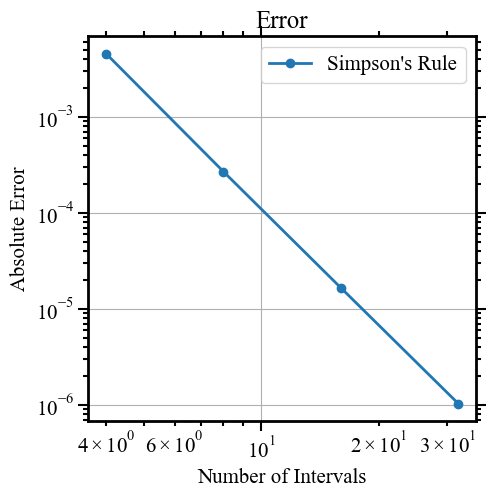

In [6]:
# Plot the errors versus the number of intervals in a log-log plot
plt.loglog(num_inter, err_window, 'o-', label='Simpson\'s Rule')
plt.xlabel('Number of Intervals')
plt.ylabel('Absolute Error')
plt.title('Error')
plt.legend()
plt.grid()
plt.show()

##### Gaussian quadrature rule

In [7]:
# Defin Gaussian quadrature
def Gq(f, a, b, num_pts, num_node):
    xpt = np.linspace(a, b, num_pts)
    appx = 0
    for i in range(num_pts - 1):
        t, w = np.polynomial.legendre.leggauss(num_node)
        x = 0.5 * (xpt[i+1] + xpt[i] + t * (xpt[i+1] - xpt[i]))
        y = f(x)
        appx = appx + 0.5 * (xpt[i+1]-xpt[i]) * np.sum(w * y)
    return appx

In [8]:
num_nodes = [2, 3, 4]
err_window = []
for num in num_nodes:
    print(f'\n Gaussian Quadrature Rule :{num} node')
    print('  n    appx       error           convergence rate')
    old_err = np.nan
    for num_pts in num_inter:
        appx = Gq(f, x0, xN, num_pts,num)
        err = abs(exact - appx)
        ratio = old_err/err
        old_err = err
        err_window.append(err)
        print(f' {num_pts:2d}    {appx:6f}   {err:4e}    {ratio:.2f}')



 Gaussian Quadrature Rule :2 node
  n    appx       error           convergence rate
  4    1.999423   5.767139e-04    nan
  8    1.999981   1.890325e-05    30.51
 16    1.999999   8.920429e-07    21.19
 32    2.000000   4.884730e-08    18.26

 Gaussian Quadrature Rule :3 node
  n    appx       error           convergence rate
  4    2.000001   1.358626e-06    nan
  8    2.000000   8.162687e-09    166.44
 16    2.000000   8.385737e-11    97.34
 32    2.000000   1.075140e-12    78.00

 Gaussian Quadrature Rule :4 node
  n    appx       error           convergence rate
  4    2.000000   1.691958e-09    nan
  8    2.000000   1.865175e-12    907.13
 16    2.000000   4.440892e-15    420.00
 32    2.000000   0.000000e+00    inf


/Users/boyeon/opt/anaconda3/envs/cse5023/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


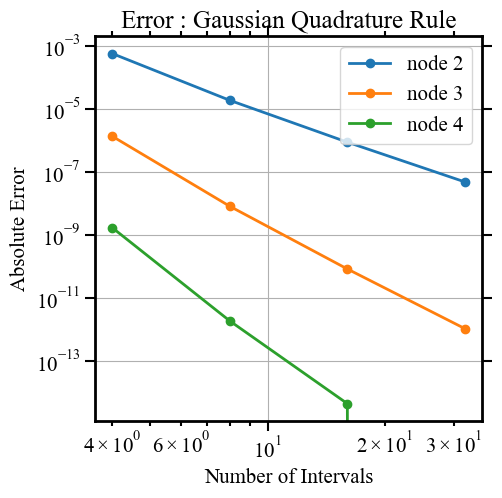

In [9]:
err_window = np.reshape(err_window, (len(num_nodes), len(num_inter)))

# Plot the errors versus the number of intervals in a log-log plot
plt.loglog(num_inter, err_window[0], 'o-', label='node 2')
plt.loglog(num_inter, err_window[1], 'o-', label='node 3')
plt.loglog(num_inter, err_window[2], 'o-', label='node 4')
plt.xlabel('Number of Intervals')
plt.ylabel('Absolute Error')
plt.title('Error : Gaussian Quadrature Rule')
plt.legend()
plt.grid()
plt.show()

### 2. Develop a quadrature method based on cubic spline interpolation.

In [10]:
import numpy as np
from scipy.interpolate import CubicSpline

def cubic_spline_quadrature(f, a, b, num_pts):
    x = np.linspace(a, b, num_pts)
    y = f(x)
    cs = CubicSpline(x, y, bc_type='natural')

    # spline한 구간내에서 midpoint rule적용
    appx = 0
    for i in range(num_pts - 1):
        h = (x[i+1] - x[i])/num_pts
        x_mid = np.linspace((x[i] + h) / 2, (x[i+1] + h)/2, num_pts)
        appx = appx + np.sum(cs(x_mid))*h
    return appx
    
# Define the integrand function
def f(x):
    return np.sin(x)

# Exact value of the integral
exact = 2

# List of numbers of intervals to use
n_values = [4, 8, 16, 32, 64, 128]

# Compute the approximated values and errors using the midpoint rule
err_window = []
value_window = []
print('    n    appx         error           convergence rate')
old_err = np.nan
for n in n_values:
    apprx = cubic_spline_quadrature(f, 0, np.pi, n)
    value_window.append(apprx)
    err = abs(apprx-exact)
    ratio = old_err/err
    old_err = err
    err_window.append(err)
    print(f' {n:4d}    {apprx:6f}     {err:4e}        {ratio:.2f}')


    n    appx         error           convergence rate
    4    2.221284     2.212843e-01        nan
    8    2.053947     5.394695e-02        4.10
   16    2.012919     1.291890e-02        4.18
   32    2.003150     3.150299e-03        4.10
   64    2.000777     7.773506e-04        4.05
  128    2.000193     1.930463e-04        4.03


### 3. Use the cubic spline-quadrature method developed in part 2 to calculate the integral. Discuss the error for numerical integrations by varying the number of intervals.

Text(0.5, 1.0, 'Error : cubic spline quadrature')

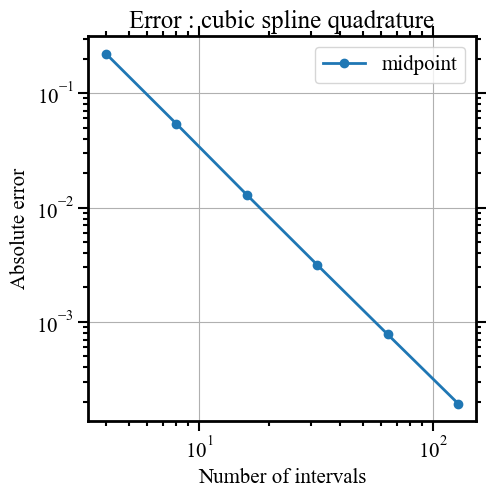

In [11]:

# Plot the errors versus the number of intervals
import matplotlib.pyplot as plt
plt.loglog(n_values, err_window, 'o-', label = 'midpoint')
plt.xlabel('Number of intervals')
plt.ylabel('Absolute error')
plt.legend()
plt.grid()
plt.title('Error : cubic spline quadrature')


### 4. Use the Monte-Carlo method to calculate the integral.

In [12]:
def MonteCalro(f, x0, xN, num_pts):
    x = x0 + (xN - x0) * np.random.random(num_pts)
    data = f(x)
    mean = data.mean()
    var = data.var()
    appx = (xN-x0)*mean
    return[appx, mean, var]

In [13]:
print('\n MonteCalro method')
print('      n    appx      error      var        sig(I)')
err_window = []
for i in range(6):
    num_pts = 10**i
    appx, mean, var = MonteCalro(f, x0, xN, num_pts)
    err = abs(exact - appx)
    sigI = (xN - x0)*np.sqrt(var/num_pts)
    err_window.append(err)
    print(f' {num_pts:6d}    {appx:.5f}   {err:.5f}    {var:.5f}    {sigI:.5f}')


 MonteCalro method
      n    appx      error      var        sig(I)
      1    2.81605   0.81605    0.00000    0.00000
     10    1.50944   0.49056    0.07537    0.27274
    100    2.02566   0.02566    0.09612    0.09740
   1000    1.98538   0.01462    0.09314    0.03032
  10000    1.99347   0.00653    0.09385    0.00962
 100000    2.00254   0.00254    0.09466    0.00306
